In [1]:
import cv2
import dlib
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

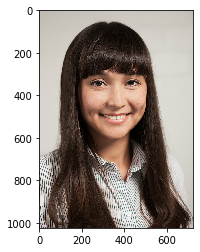

In [2]:
face_file_path = 'girl.jpg'
# karina = cv2.imread(face_file_path, cv2.IMREAD_COLOR)
# plt.imshow(karina[:, :, ::-1])

# Load the image using Dlib
karina = dlib.load_rgb_image(face_file_path)

plt.imshow(karina)
plt.show()

In [3]:
predictor_path = 'shape_predictor_68_face_landmarks.dat'
# Load all the models we need: a detector to find the faces, a shape predictor
# to find face landmarks so we can precisely localize the face
detector = dlib.get_frontal_face_detector()
landmark_detector = dlib.shape_predictor(predictor_path)

In [4]:
# Ask the detector to find the bounding boxes of each face. The 1 in the
# second argument indicates that we should upsample the image 1 time. This
# will make everything bigger and allow us to detect more faces.
face_dets = detector(karina, 1)
num_faces = len(face_dets)
print(f"Number of found faces '{num_faces}' in file '{face_file_path}'")

Number of found faces '1' in file 'girl.jpg'


In [5]:
def draw_landmarks(img, landmarks):
    for i, point in enumerate(landmarks.parts()):
        x = point.x
        y = point.y
        
        cv2.circle(img, (x, y), 1, (0, 0, 255), 2, cv2.LINE_AA)
        cv2.putText(
            img,
            str(i + 1),
            (x, y),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.3,
            (255, 0, 0),
            1
        )

In [6]:
resulted_img = karina.copy()
for face_rect in face_dets:
    landmarks = landmark_detector(karina, face_rect)
    print(f"Number of landmarks '{len(landmarks.parts())}'")
    
    draw_landmarks(resulted_img, landmarks)

Number of landmarks '68'


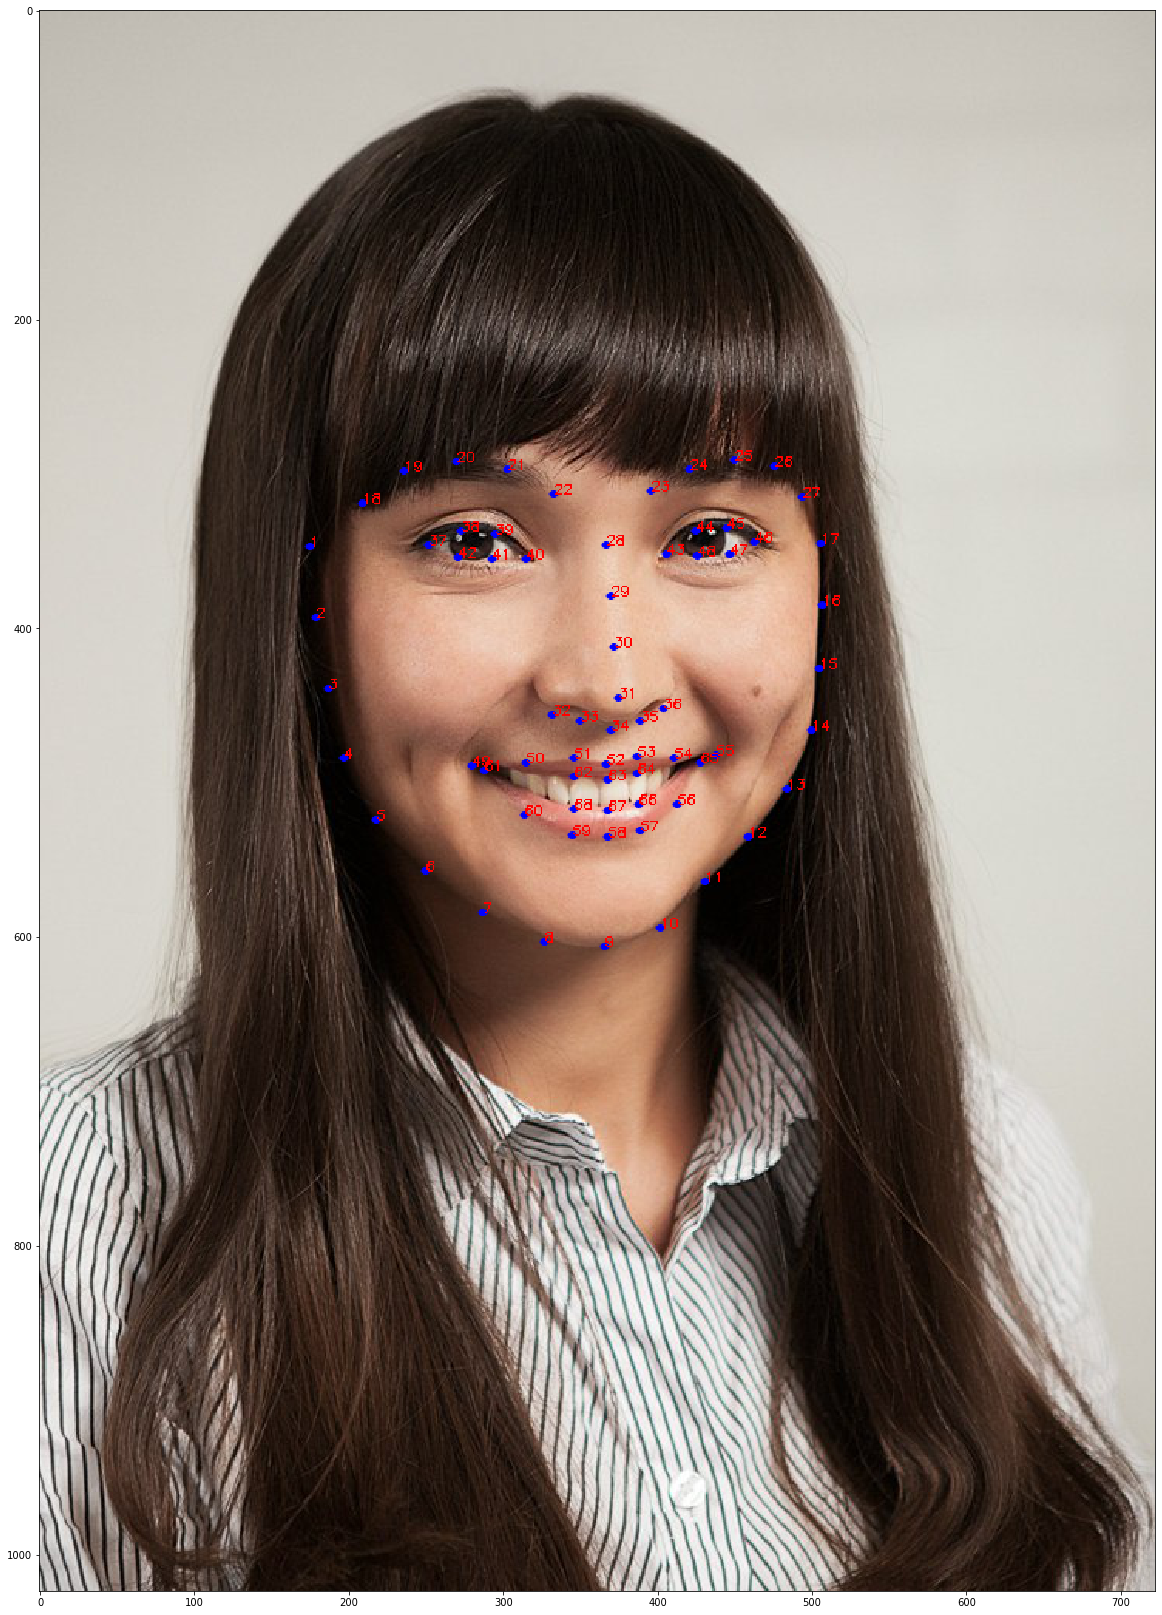

In [7]:
plt.figure(figsize=(20, 40))
plt.imshow(resulted_img)
plt.show()

In [8]:
cv2.imwrite('resulted_girl.jpg', resulted_img[:, :, ::-1])

True